In [1]:
import os 
import numpy as np
import pandas as pd
from parse import data, criteria, decision_classes, pairwise_comparisons

<div style="background-color: #990000; color: white; text-align: center">
    <h1>Data specification</h1>
</div>

<div style="background-color: #999900; color: white; text-align: center">
    <p>Dataset questions</p>
</div>

1. What is the domain of the problem about?  
<p style="color: #993300">The domain problem is about ranking movies and selecting the best ones to watch </p>

2. What is the source of the data?  
<p style="color: #993300">Data was fetched from IMDB and Wikipedia.</p>  

3. What is the point of view of the decision maker?  
<p style="color: #993300">The decision maker is a movie lover who wants to watch the best movies.</p>

4. What is the number of alternatives considered? Were there more of them in the original data set?  
<p style="color: #993300">We have 31 alternatives. There is no particular "original" data set, but in general, there is a lot of movies out there. We've just selected some form the top of the imdb rankings and some in a more random fashion. </p>

5. Describe one of the alternatives considered (give its name, evaluations, specify preferences for this
alternative)
<p style="color: #993300">"The Godfather" is rated on 7 criteria being: Acting (10/10), Plot (5/5), Pictures (8/10), Music (5/5), Sentiment (1/1), Critics Score (9/10), Oscars Won (3/23)</p>

In [2]:
data

,Movie,Acting,Plot,Pictures,Music,Sentiment,Critics Score,Oscars Won
0,The Shawshank Redemption,9,5,8,4,1,9,7
1,The Godfather,10,5,8,5,1,9,3
2,The Dark Knight,9,4,9,5,1,8,2
3,Pulp Fiction,9,5,7,5,1,8,1
4,The Lord of the Rings: The Return of the King,9,5,10,5,1,9,11
5,Schindler's List,10,5,8,4,1,9,7
6,Inception,9,4,10,5,1,8,4
7,Fight Club,10,4,9,5,1,8,1
8,Forrest Gump,9,4,7,4,1,8,6
9,The Matrix,9,4,8,5,1,8,4


6. What is the number of criteria considered? Were there more of them in the original data set?  
<p style="color: #993300">We have 7 criteria. Since there is no particular "original" data set, we can't say if there were more criteria in the original data set. </p>


7. What is the origin of the various criteria? (catalog parameter / created by the decision maker - how?)  
<p style="color: #993300">The criteria were created by the decision maker (us). We've selected the criteria that we think correlate with a movie being considered good. </p>


8. What are the domains of the individual criteria (discrete / continuous)? Note: in the case of continuous
domains, specify the range of the criterion’s variability, in the case of others: list the values. What is
the nature (gain / cost) of the individual criteria?  

In [3]:
criteria

,Criterion,Description,Value Type,Min Value,Max Value,Direction
0,Acting,Quality of performances by the cast,Discrete,1,10,gain
1,Plot,Depth and engagement of the storyline,Discrete,1,5,gain
2,Pictures,Cinematography and visual aesthetics,Discrete,1,10,gain
3,Music,Quality and impact of the soundtrack,Discrete,1,5,gain
4,Sentiment,Overall sentiment conveyed by the movie,Discrete,0,1,gain
5,Critics Score,Average score assigned by critics,Continuous,1,10,gain
6,Oscars Won,Total number of Oscars won by the movie,Discrete,0,23,gain


9. Are all criteria of equal importance (should they have the same ”weights”)? If not, can the relative
importance of the criteria under consideration be expressed in terms of weights? In this case, estimate
the weights of each criterion on a scale of 1 to 10. Are there any criteria among the criteria that are
completely or almost invalid / irrelevant?  

<p style="color: #993300">The criteria are not of equal importance. We can assign our subjective relative importance of the criteria can be expressed in terms of weights.</p>

In [10]:
CRITERIA_WEIGHTS = {
    'Acting': 7,
    'Plot': 10,
    'Pictures': 6,
    'Music': 8,
    'Sentiment': 2,
    'Critics Score': 8,
    'Oscars Won': 3
}

10. Are there dominated alternatives among the considered data set? If so, present all of them (dominating
and dominated alternative), giving their names and values on the individual criteria.  



In [11]:
from EasyMCDM.models.Pareto import Pareto
data_np = data.to_numpy()

p = Pareto(data_np, verbose=True)
res = p.solve(indexes=range(0, 7), prefs=['max']*7)

nondominated = [mov for mov in res if len(res[mov]['Dominated-by']) == 0]
dominated = [mov for mov in res if len(res[mov]['Dominated-by']) > 0]

print('Non-dominated alternatives:')
print(nondominated)
    
print('Dominated alternatives:')
print(dominated)


Non-dominated alternatives:
['The Lord of the Rings: The Return of the King', "Schindler's List", 'The Godfather Part II', 'The Prestige']
Dominated alternatives:
['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'Pulp Fiction', 'Inception', 'Fight Club', 'Forrest Gump', 'The Matrix', 'Se7en', 'Gladiator', 'Dune 2', 'Shutter Island', 'Whiplash', 'The Silence of the Lambs', 'The Green Mile', 'Goodfellas', 'The Departed', 'Catwoman', 'Batman & Robin', 'Gigli', 'The Room', 'Jack and Jill', 'Birdemic: Shock and Terror', 'Battlefield Earth', 'Superbabies: Baby Geniuses 2', 'Fifty Shades of Grey', 'Transformers: Revenge of the Fallen', 'Foodfight!']


11. What should the theoretically best alternative look like in your opinion? Is it a small advantage on
many criteria, or rather a strong advantage on few (but key) criteria? Which?  
<p style="color: #993300">The theoretically best alternative should have a strong advantage on few (but key) criteria. The key criteria are the ones that we consider to be the most important. However, I think that in our case, the best alternative would just excel in all criteria, since they all pertain to the quality of the movie. </p>



12. Which of the considered alternatives (provide name and values on individual criteria) seems to be the
best / definitely better than the others? Is it determined by one reason (e.g. definitely the lowest
price) or rather the overall value of the criteria? Does this alternative still have any weaknesses?  
<p style="color: #993300">There is a couple of really strong movies in our data set. `The Godfather` is one of them. It has a really high score in all criteria except Oscars Won, where they "only" won 3 Oscars, which is not a huge amount for the best movies that exist. `The Lord of the Rings: The Return of the King` is another one, it excels an all criteria, but has an exceptionally high number of Oscars won - 11, which distinguishes it from others. </p>


13. Which of the considered alternatives (provide name and values on individual criteria) seems to be the
worst / definitely worse than the others? Is it determined by one reason (e.g. definitely the highest
price), or rather the overall value of the criteria? Does this alternative still have any strengths?
<p style="color: #993300">The worst movie in our data set is `The Room`, `Birdemic: Shock and Terror` and `Foodfight!`. They all share the lowest scores possible in all criteria, which definitely says something about their quality. (However, <a href="https://www.youtube.com/watch?v=LrxZblVUkMU"> Birdemic is kind of a masterpiece! </a> )  </p>

<div style="background-color: #999900; color: white; text-align: center">
    <p>Decision classes</p>
</div>

In [12]:
decision_classes

,Decision class
0,Must watch
1,Good movie
2,Meh
3,Maybe
4,Skip


<div style="background-color: #999900; color: white; text-align: center">
    <p>Pairwise comparisons</p>
</div>

In [13]:
pairwise_comparisons

,name1,name2,relation
0,The Godfather,Forrest Gump,better
1,Catwoman,The Prestige,worse
2,Inception,Pulp Fiction,better
3,Batman & Robin,The Dark Knight,worse
4,Whiplash,The Dark Knight,better


<div style="background-color: #990000; color: white; text-align: center">
    <h1>PROMETHEE</h1>
</div>

In [14]:
from preference_functions import CriterionType, VShapeWithIndifference, UShape, MarginalPreferenceMatrix, ComprehensivePreferenceIndex, PrometheeI, PrometheeII

PROMETHEE_SAVE_DIR = 'results/promethee' # Directory to save the marginal preference matrices, just for debugging and analysis
os.makedirs(PROMETHEE_SAVE_DIR, exist_ok=True) 

<div style="background-color: #999900; color: white; text-align: center">
    <p>Hyperparams</p>
</div>

In [15]:
# TODO: Select more preference functions for each criterion so that they make more sense
pfunction1 = VShapeWithIndifference(2.0, 2.5, CriterionType.GAIN)
pfunction2 = VShapeWithIndifference(1.0, 1.5, CriterionType.GAIN)
sentiment_pfunction = UShape(0.5, None, CriterionType.GAIN)

FUNCTIONS_FOR_CRITERIA = {
    'Acting': pfunction1,
    'Plot': pfunction2,
    'Pictures': pfunction1,
    'Music': pfunction2,
    'Sentiment': sentiment_pfunction,
    'Critics Score': pfunction1,
    'Oscars Won': pfunction1
}

<div style="background-color: #999900; color: white; text-align: center">
    <p>Marginal preference matrices for each criterion</p>
</div>

In [16]:
marg_matrices = []
weights = []
for criterion in criteria['Criterion']:
    matrix = MarginalPreferenceMatrix(data[criterion], pfunction1, names=data['Movie'])
    matrix.save(f'{PROMETHEE_SAVE_DIR}/{criterion}_matrix.csv')
    marg_matrices.append(matrix)
    weights.append(CRITERIA_WEIGHTS[criterion])

# Comprehensive preference index
cpi = ComprehensivePreferenceIndex(marg_matrices, weights)
cpi.save(f'{PROMETHEE_SAVE_DIR}/cpi.csv')
cpi.get_as_dataframe().head(3)

Movie,The Shawshank Redemption,The Godfather,The Dark Knight,Pulp Fiction,The Lord of the Rings: The Return of the King,Schindler's List,Inception,Fight Club,Forrest Gump,The Matrix,...,Batman & Robin,Gigli,The Room,Jack and Jill,Birdemic: Shock and Terror,Battlefield Earth,Superbabies: Baby Geniuses 2,Fifty Shades of Grey,Transformers: Revenge of the Fallen,Foodfight!
Movie,,,,,,,,,,,,,,,,,,,,,
The Shawshank Redemption,0.0,0.068182,0.068182,0.068182,0.0,0.0,0.068182,0.068182,0.0,0.068182,...,0.772727,0.772727,0.954545,0.772727,0.954545,0.772727,0.954545,0.772727,0.772727,0.954545
The Godfather,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.704545,0.954545,0.954545,0.954545,0.954545,0.954545,0.954545,0.772727,0.772727,0.954545
The Dark Knight,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.477273,0.886364,0.886364,0.659091,0.886364,0.659091,0.886364,0.477273,0.477273,0.886364


<div style="background-color: #999900; color: white; text-align: center">
    <p>Calculating Promethee I partial and complete ranking</p>
</div>

Positive ranking


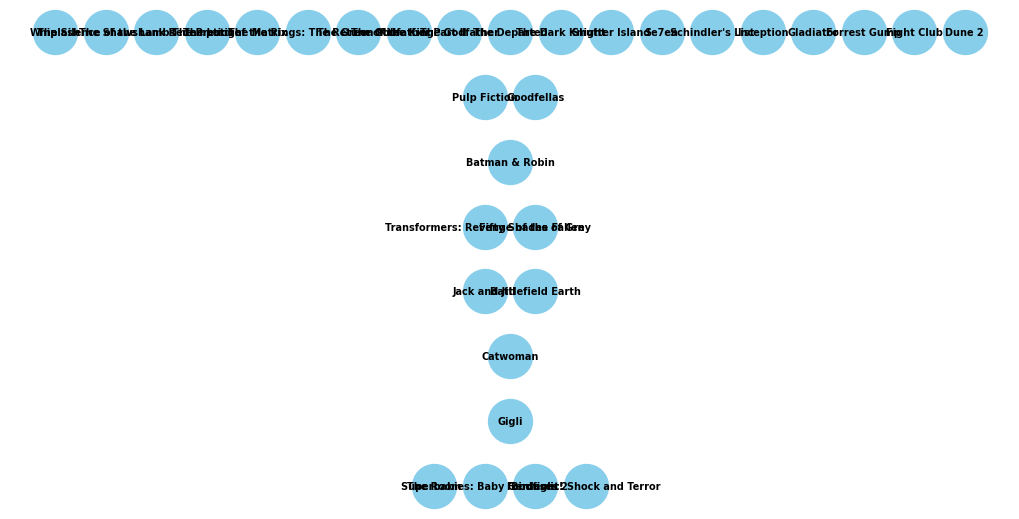

In [17]:
# Create ranking
promethee1 = PrometheeI(cpi)

print('Positive ranking')
promethee1.plot_ranking(type='positive', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom1_positive.png', show=True)

Negative ranking


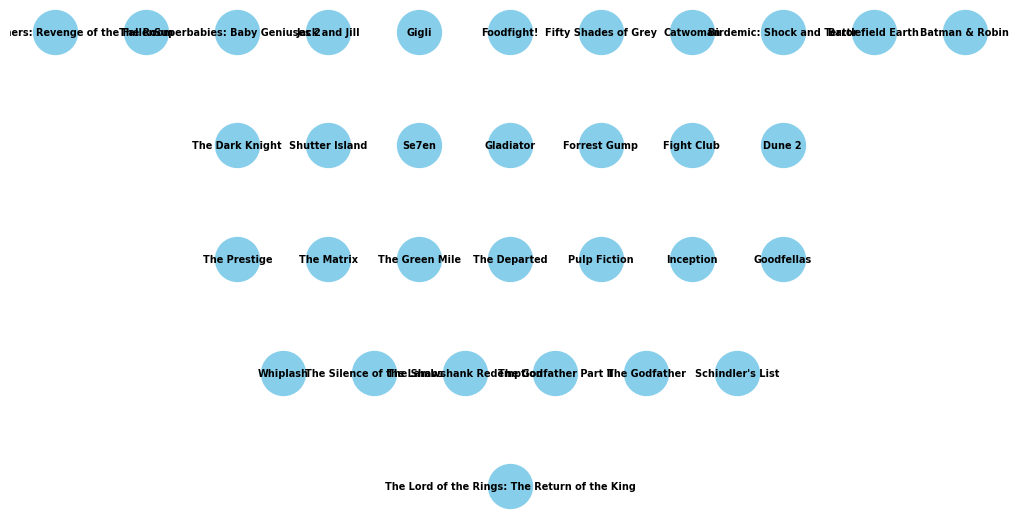

In [18]:
print('Negative ranking')
promethee1.plot_ranking(type='negative', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom1_negative.png', show=True)

Complete ranking


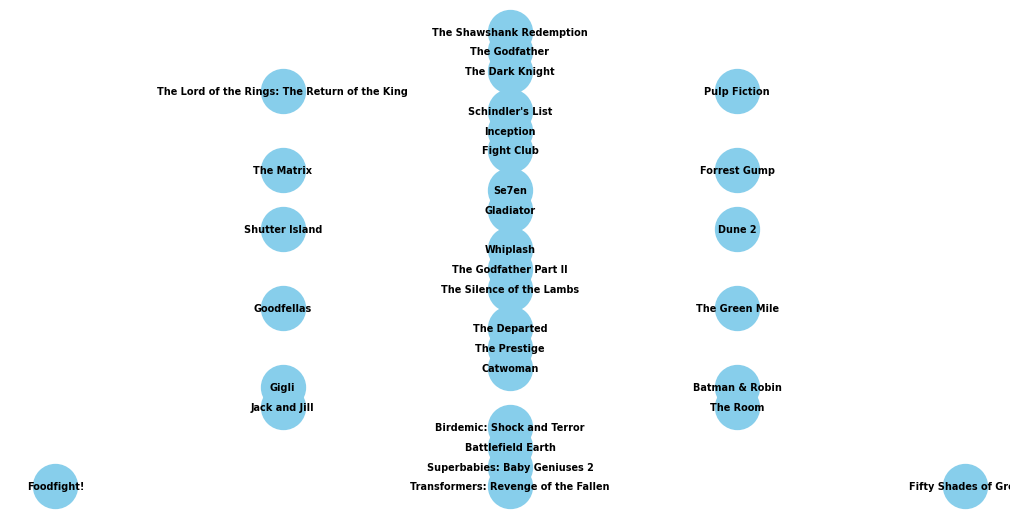

In [19]:
print('Complete ranking')
promethee1.plot_ranking(type='overall', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom1_overall.png', show=True)

<div style="background-color: #999900; color: white; text-align: center">
    <p>Calculating Promethee II partial and complete ranking</p>
</div>

Positive ranking


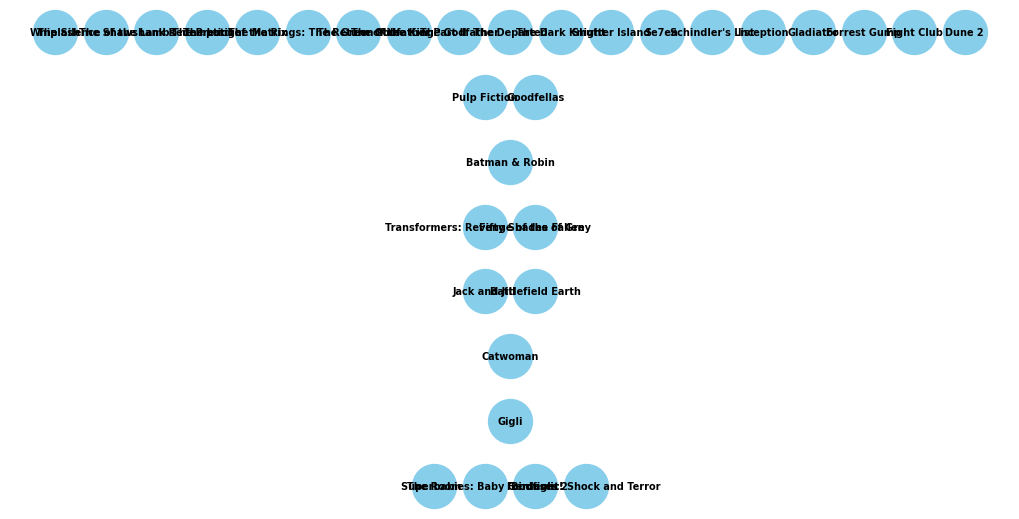

In [20]:
# Do the same for Promethee II
promethee2 = PrometheeII(cpi)
print('Positive ranking')
promethee2.plot_ranking(type='positive', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom2_positive.png', show=True)

Negative ranking


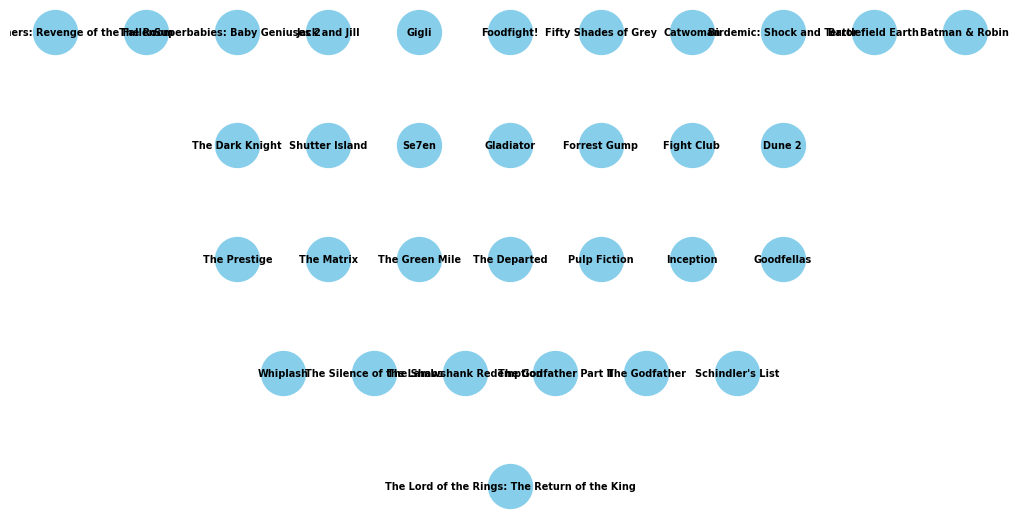

In [21]:
print('Negative ranking')
promethee2.plot_ranking(type='negative', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom2_negative.png', show=True)

Complete ranking


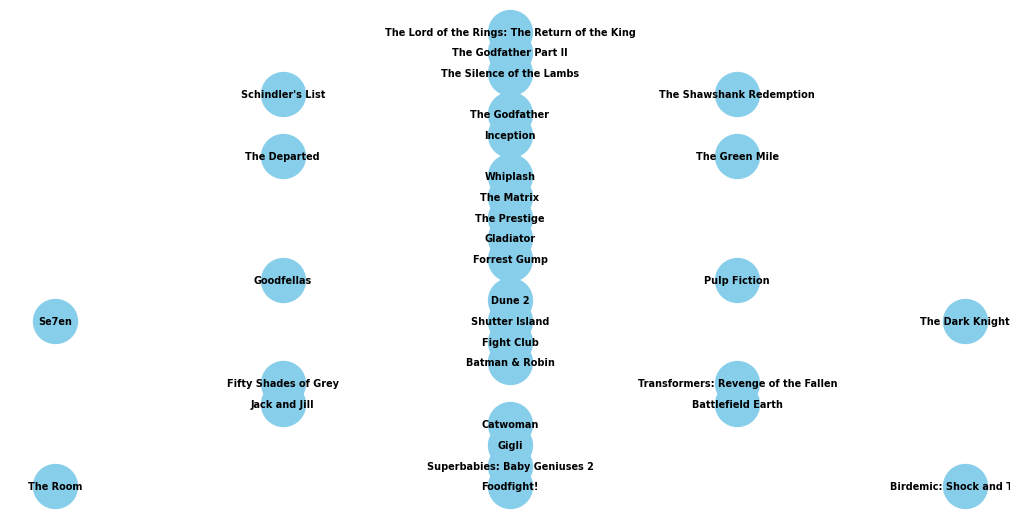

In [22]:
print('Complete ranking')
promethee2.plot_ranking(type='overall', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom2_overall.png', show=True)

<div style="background-color: #999900; color: white; text-align: center">
    <p>Comparison to prior</p>
</div>

In [23]:
# Check if pairwise comparisons are consistent with promethee ranking
pairwise_comparisons

,name1,name2,relation
0,The Godfather,Forrest Gump,better
1,Catwoman,The Prestige,worse
2,Inception,Pulp Fiction,better
3,Batman & Robin,The Dark Knight,worse
4,Whiplash,The Dark Knight,better


In [24]:
prometheeI_ranking = promethee1.overall_ranking

compliance = 0

for i, row in pairwise_comparisons.iterrows():
    mov1 = row['name1']
    mov2 = row['name2']
    relation = row['relation']
    
    if relation == 'better':
        if prometheeI_ranking[mov1] < prometheeI_ranking[mov2]: # Lower rank is better
            print(f'Correct: {mov1} is better than {mov2}')
            compliance += 1
        else:
            print(f'Incorrect: {mov1} is better than {mov2}')
    elif relation == 'worse':
        if prometheeI_ranking[mov1] > prometheeI_ranking[mov2]: # Lower rank is better
            print(f'Correct: {mov1} is worse than {mov2}')
            compliance += 1
        else:
            print(f'Incorrect: {mov1} is worse than {mov2}')
            
print(f'Compliance with prior user pairwise comparisions : {compliance}/{len(pairwise_comparisons)}')

Compliance with prior user pairwise comparisions : 0/5


<div style="background-color: #990000; color: white; text-align: center">
    <h1>ELECTRE</h1>
</div>